In [1]:
import numpy as np
import pandas as pd

class LinearRegressor:
    ''' simple univariate linear regression using gradient descent for optimal fit '''

    def fit(self, X, y, iters=10, learning_rate=0.005):
        # this should set the final w (slope) and b (bias/y-intercept) values to be used when predicting

        # w and b start at 0
        w = b = 0
        dataset = np.c_[X, y]
        
        # for i iterations:
        # 1 - calculate the sum of the gradients calculated for all the training datapoints
        # 2 - update weight and bias by scaling sum by learning rate
        for i in range(iters):
            w2, b2 = self._gradient(w, b, dataset) # 1
            
            w -= w2 * learning_rate
            b -= b2 * learning_rate
            print(w)
            
        self.w = w
        self.b = b

    def _gradient(self, w, b, dataset):
        # calculate the average of the gradients (of w and b) calculated for all the datapoints 
        N = dataset.shape[0] # number of datapoints
        w_grad_sum = b_grad_sum = 0
        
        for sample in dataset:
            x_i, y_i = sample[0], sample[1]
            
            w_grad_sum += -2 * x_i * (y_i - (w * x_i + b))
            b_grad_sum += -2 * (y_i - (w * x_i + b))

        return w_grad_sum/N, b_grad_sum/N
            
    def predict(self, X):
        
        y_preds = [self.predict_one(x) for x in X]
        return y_preds

    def predict_one(self, x):
        return self.w * x[0] + self.b

This simple linear regressor can only handle one input feature, so we'll ust be trying to predict wine quality based on alcohol content, the feature with the strongest correlation to quality.

In [2]:
from sklearn.model_selection import train_test_split
wine_df = pd.read_csv('../datasets/winequality-red.csv')
X, y = pd.DataFrame(wine_df["density"]), pd.DataFrame(wine_df["alcohol"])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
model = LinearRegressor()
model.fit(np.array(X_train), np.array(y_train))

0.1038915611189881
0.20571200765924774
0.305502625992089
0.40330387947088114
0.49915542483739916
0.5930961283011216
0.6851640812979948
0.7753966159350589
0.8638303201271941
0.9505010524321236


In [4]:
y_preds = model.predict(np.array(X_test))

In [5]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_preds)))

8.586158302291961


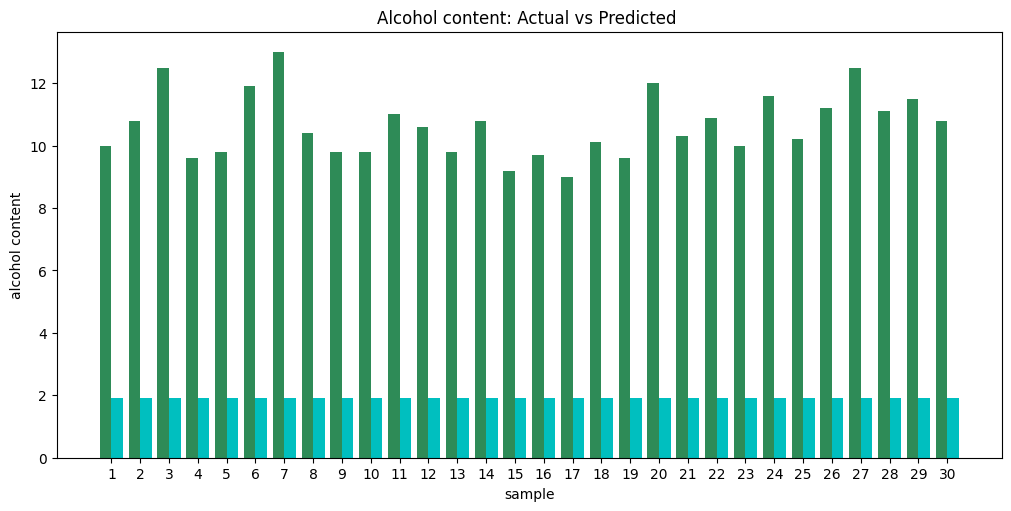

In [6]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(layout="constrained")
y_test = y_test.reset_index()
y_preds = pd.DataFrame(y_preds)
y_preds = y_preds.rename(columns={0: "alcohol"})

ax.bar(y_test.index[:30]-0.2, y_test['alcohol'][:30], width=0.4, color="seagreen") 
ax.bar(y_test.index[:30]+0.2, y_preds['alcohol'][:30], width=0.4, color="c") 
ax.set_title("Alcohol content: Actual vs Predicted ")
ax.set_xticks(np.arange(0,30,1), labels=[i for i in range(1,31)])
ax.set_xlabel("sample")
ax.set_ylabel("alcohol content")
fig.set_size_inches(10,5)
fig.show()